In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/wine_sales_pa.csv")

In [3]:
data.index = pd.to_datetime(data['Month'])
data.drop(columns='Month',inplace=True)

In [4]:
data.tail()

,Sales
Month,
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298
1972-08-01,1413
1972-09-01,5877


In [5]:
data.isna().sum()

Sales    0
dtype: int64

<Axes: xlabel='Month'>

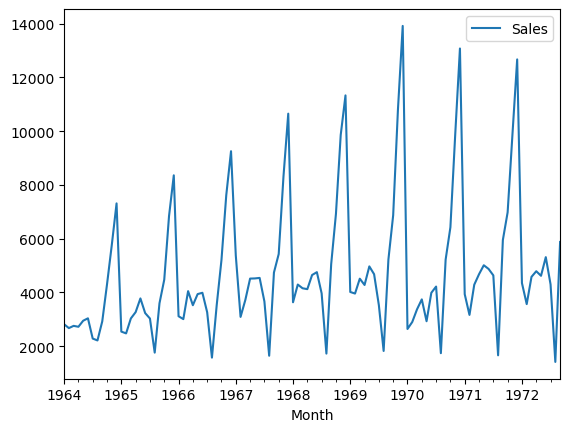

In [6]:
data.plot()

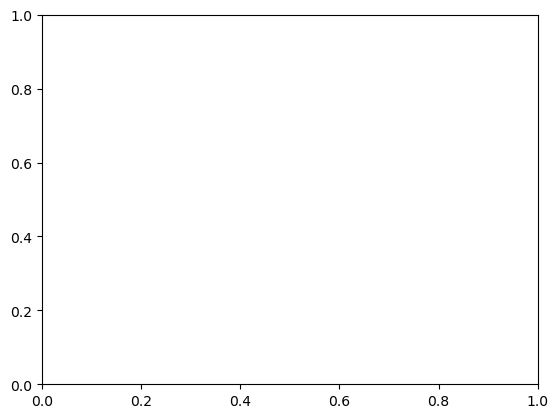

In [7]:
rolling_mean = data.rolling(window = 12).mean()
data['rolling_mean_diff'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()

In [8]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

model = ARIMA(data["Sales"], order=(1,1,1))
model_fit = model.fit()
#history=model.fit()

C:\Users\petec\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\petec\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\petec\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [9]:
data['forecast']=model_fit.predict(start=90,end=103,dynamic=True)

In [10]:
model=ARIMA(data['rolling_mean_diff'].dropna(),order=(1,1,1))
model_fit=model.fit()

C:\Users\petec\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\petec\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\petec\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [11]:
data['forecast']=model_fit.predict(start=90,end=103,dynamic=True)

In [12]:
model=sm.tsa.statespace.SARIMAX(data['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\petec\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\petec\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [13]:
data['forecast']=results.predict(start=90,end=100,dynamic=True)

In [14]:
from pandas.tseries.offsets import DateOffset
pred_date=[data.index[-1]+ DateOffset(months=x)for x in range(0,48)]

In [15]:
pred_date=pd.DataFrame(index=pred_date[1:],columns=data.columns)

In [16]:
data=pd.concat([data,pred_date])

<Axes: >

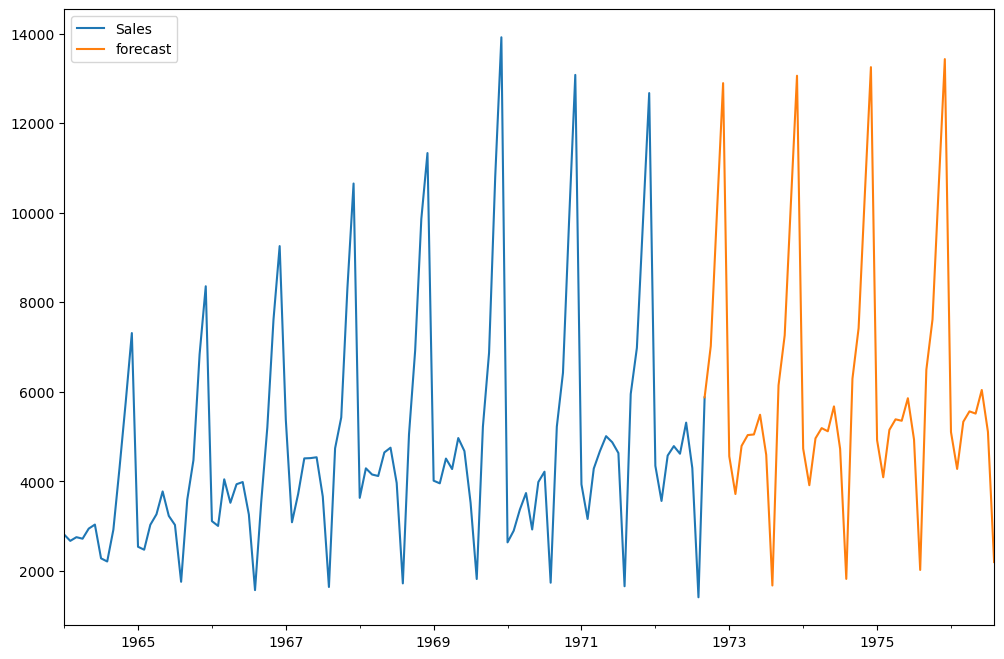

In [17]:
data['forecast'] = results.predict(start = 104, end = 240, dynamic= True)  
data[['Sales', 'forecast']].plot(figsize=(12, 8))